In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from decimal import *
import math
import numpy as np

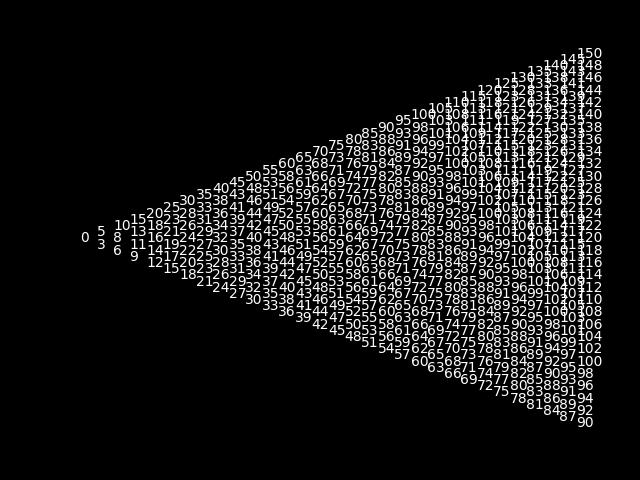

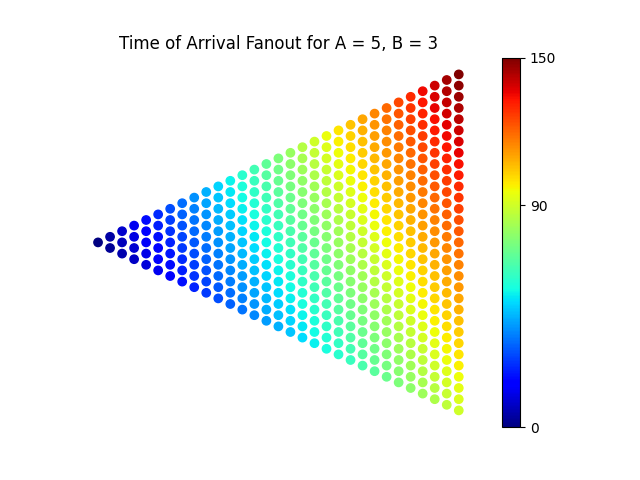

In [2]:
A = Decimal('5')
B = Decimal('3')

number_of_lines = 30

x_scale = 4
y_scale = 2

Delta = A - B 

#fanout_number_diagram = []
#row = []
x_numbers = []
y_numbers = []
numbers = []

#fanout_number_diagram.append(0)
x_numbers.append(0)
y_numbers.append(0)
numbers.append(0)



for i in range(1,number_of_lines+1):
    row_number = i
    items_in_row = row_number + 1

    #row = []
    top_number = A*row_number
    y_number = row_number

    for j in range(0,items_in_row):
        #row.append(top_number)
        x_numbers.append(row_number*x_scale)
        y_numbers.append(y_number*y_scale)
        numbers.append(top_number)

        top_number = top_number - Delta
        y_number = y_number - 2
        
    
    #fanout_number_diagram.append(row)



%matplotlib widget
#%matplotlib 

fig_numbers, ax_numbers = plt.subplots()

x_max = number_of_lines * x_scale
ax_numbers.set_xlim([0,x_max])
ax_numbers.set_ylim([-x_max/2,x_max/2])
ax_numbers.axis('off')

fig_numbers.set_facecolor("black")

for x,y,n in zip(x_numbers,y_numbers,numbers):

    ax_numbers.text(x,y,n,c="white")

fig_colour, ax_colour = plt.subplots()

#ax_colour.set_xlim([0,30])
#ax_colour.set_ylim([-15,15])
ax_colour.axis('off')

ax_colour.set_title('Time of Arrival Fanout for A = ' + str(A)+', B = '+ str(B))
cax = ax_colour.scatter(x_numbers,y_numbers,c=numbers,cmap=cm.jet)
cbar = fig_colour.colorbar(cax, ticks=[0, int(numbers[len(numbers)-1]),int(numbers[len(numbers)-number_of_lines-1])])

In [3]:
def lcm(x, y):

    x = Decimal(str(x))
    y = Decimal(str(y))

    x_num,x_den = x.as_integer_ratio()
    y_num,y_den = y.as_integer_ratio()

    multiply_factor = x_den * y_den

    x_big = x_num * multiply_factor   
    y_big = y_num * multiply_factor   

    GCD = math.gcd(x_big,y_big)
    GCD_scaled = GCD/(multiply_factor*multiply_factor)

    LCM_scaled = x_big* y_big/(GCD*multiply_factor)

    return GCD_scaled,LCM_scaled

In [4]:
def lcm_log(x, y):

    x = Decimal(str(x))
    y = Decimal(str(y))

    x_num,x_den = x.as_integer_ratio()
    y_num,y_den = y.as_integer_ratio()

    multiply_factor = x_den * y_den

    x_big = x_num * multiply_factor   
    y_big = y_num * multiply_factor   

    GCD = math.gcd(x_big,y_big)

    GCD_scaled = np.log(GCD/(multiply_factor*multiply_factor))
    LCM_scaled = np.log(x_big* y_big/(GCD*multiply_factor))

    return GCD_scaled,LCM_scaled

In [5]:
lcm(A,B)

(1.0, 15.0)

In [20]:
lcm(Decimal('7.1'),Decimal('5'))

(0.1, 355.0)

In [7]:
A*B

Decimal('15')

In [8]:
v_lcm = np.vectorize(lcm)
v_lcm_log = np.vectorize(lcm_log)

In [9]:
x_step = 1#0.0001
x_start = 1#np.around(0 + x_step + 0.3,4)
x_end = 100#np.around(x_start + 0.1,4)

y_step = x_step#0.01
y_start = x_start#0 + y_step
y_end = x_end#y_start + 10 

X, Y = np.mgrid[x_start:x_end:x_step,y_start:y_end:y_step]

In [10]:
print('start : ',x_start,' step : ',x_step,' end : ',x_end)

start :  1  step :  1  end :  100


In [11]:
GCD_arr_log, LCM_arr_log = v_lcm_log(X,Y)
GCD_arr, LCM_arr = v_lcm(X,Y)

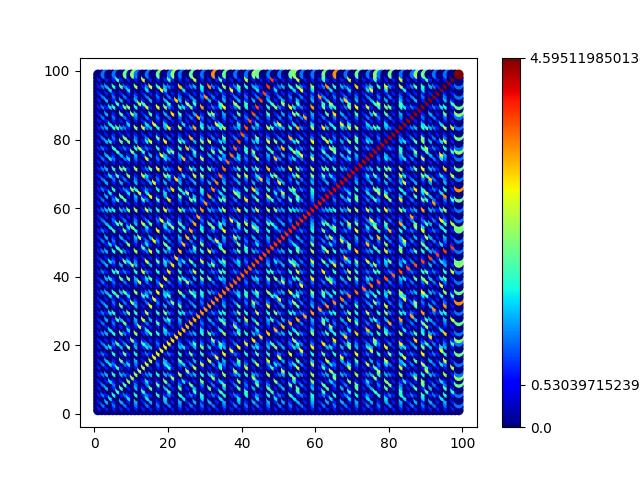

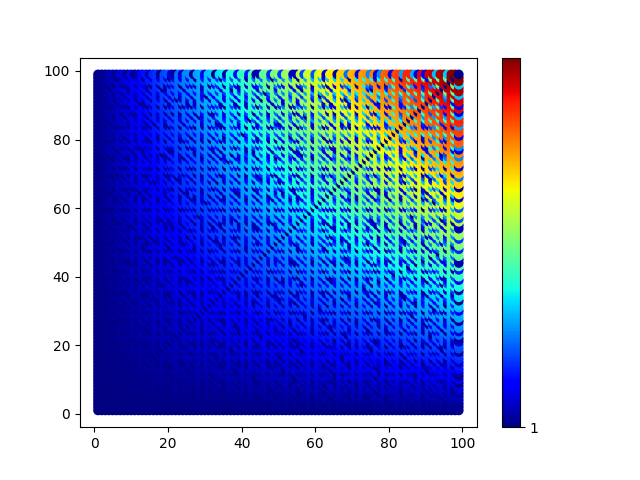

In [12]:
fig_GCD_log, ax_GCD_log = plt.subplots()

cax = ax_GCD_log.scatter(X,Y,c=GCD_arr_log,cmap=cm.jet)

mn= GCD_arr_log.min()        # colorbar min value
mx= GCD_arr_log.max()         # colorbar max value
av = GCD_arr_log.mean()

cbar = fig_GCD_log.colorbar(cax, ticks=[mn, av ,mx])
cbar.set_ticklabels([mn,av,mx])


fig_LCM, ax_LCM = plt.subplots()

cax = ax_LCM.scatter(X,Y,c=LCM_arr,cmap=cm.jet)
cbar = fig_LCM.colorbar(cax, ticks=[-1, 0, 1])

fig_GCD, ax_GCD = plt.subplots()

cax = ax_GCD.scatter(X,Y,c=GCD_arr,cmap=cm.jet)

mn=GCD_arr.min()      # colorbar min value
mx=GCD_arr.max()        # colorbar max value
md=(mx-mn)/2                     # colorbar midpoint value

cbar = fig_GCD.colorbar(cax, ticks=[mn, md, mx])
cbar.set_ticklabels([mn,md,mx])

In [13]:
lcm(0.751*2,30)

(0.002, 22530.0)

In [14]:
lcm(0.76*2,30)

(0.08, 570.0)

In [15]:
lcm(0.75*2,30)

(1.5, 30.0)

In [16]:
lcm(0.74*2,30)

(0.04, 1110.0)

In [17]:
lcm(1.5,30)

(1.5, 30.0)

In [18]:
lcm(0.47,46)

(0.01, 2162.0)

In [19]:
lcm(0.47,0.46)

(0.0002, 1081.0)